In [3]:
import pandas as pd

# Leer el archivo txt, ajustando el delimitador y nombres de columnas
file_path = '../dataset/qc00000607.txt'  # Reemplaza con la ruta de tu archivo .txt

# Cargar el archivo, asumimos que los datos están separados por espacios o tabulaciones
# Si es necesario, se puede ajustar el delimitador (por ejemplo, delimiter='\t' si es tabulación)
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Agregar nombres a las columnas
df.columns = ['Año', 'Mes', 'Día', 'Precipitación', 'Temp_max', 'Temp_min']

# Ver los primeros 5 registros
print(df.head())

    Año  Mes  Día  Precipitación  Temp_max  Temp_min
0  1964    1    1            0.0      20.5       8.0
1  1964    1    2            0.0     -99.9       4.5
2  1964    1    3            0.0     -99.9       6.0
3  1964    1    4            0.7     -99.9       6.0
4  1964    1    5            1.2     -99.9       9.1


C:\Users\victo\AppData\Local\Temp\ipykernel_2216\3118021228.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


## 2. Análisis exploratorio de datos (EDA)


In [5]:
# Revisar las primeras filas y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18932 entries, 0 to 18931
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            18932 non-null  int64  
 1   Mes            18932 non-null  int64  
 2   Día            18932 non-null  int64  
 3   Precipitación  18932 non-null  float64
 4   Temp_max       18932 non-null  float64
 5   Temp_min       18932 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 887.6 KB


In [6]:
# Descripción estadística de las columnas numéricas
df.describe()

,Año,Mes,Día,Precipitación,Temp_max,Temp_min
count,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000
mean,1989.416808,6.506867,15.729558,0.741792,18.746857,1.960944
std,14.962828,3.442581,8.800302,11.334592,14.964722,13.598506
min,1964.000000,1.000000,1.000000,-99.900000,-99.900000,-99.900000
25%,1976.000000,4.000000,8.000000,0.000000,19.200000,0.200000
50%,1989.000000,7.000000,16.000000,0.000000,20.700000,4.200000
75%,2002.000000,9.000000,23.000000,1.400000,22.000000,7.000000
max,2015.000000,12.000000,31.000000,51.600000,27.800000,11.600000


In [7]:
# Reemplazar -99.9 por NaN en las columnas de precipitación, temp_max y temp_min
df.replace(-99.9, pd.NA, inplace=True)

# Ver cuántos datos faltantes hay por columna
print(df.isnull().sum())

Año                0
Mes                0
Día                0
Precipitación    204
Temp_max         290
Temp_min         304
dtype: int64


In [9]:
# Rellenar los valores faltantes con el promedio de la columna
df['Temp_max'].fillna(df['Temp_max'].mean(), inplace=True)
df['Temp_min'].fillna(df['Temp_min'].mean(), inplace=True)
df['Precipitación'].fillna(0, inplace=True)  # Podrías usar 0 para precipitación

In [10]:
df

,Año,Mes,Día,Precipitación,Temp_max,Temp_min
0,1964,1,1,0.0,20.50000,8.0
1,1964,1,2,0.0,20.59256,4.5
2,1964,1,3,0.0,20.59256,6.0
3,1964,1,4,0.7,20.59256,6.0
4,1964,1,5,1.2,20.59256,9.1
...,...,...,...,...,...,...
18927,2015,10,27,4.2,17.50000,8.2
18928,2015,10,28,5.1,18.20000,6.2
18929,2015,10,29,0.0,21.70000,5.2
18930,2015,10,30,0.5,21.50000,8.2


In [11]:
print("Promedio de temperatura máxima:", df['Temp_max'].mean())
print("Promedio de temperatura mínima:", df['Temp_min'].mean())

Promedio de temperatura máxima: 20.592559811179065
Promedio de temperatura mínima: 3.6232660511058623


In [12]:
print("Precipitación total en el mes:", df['Precipitación'].sum())

Precipitación total en el mes: 34423.2


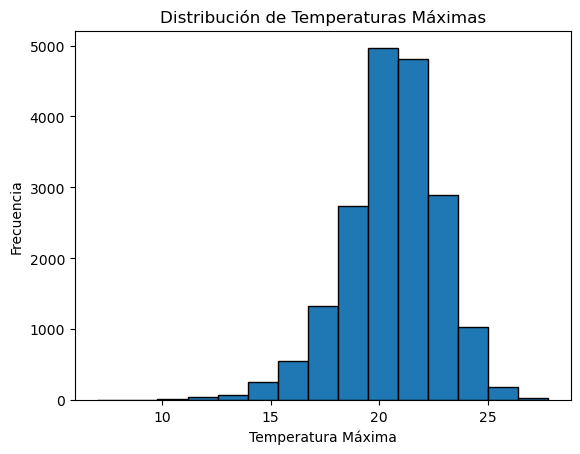

In [14]:
import matplotlib.pyplot as plt
# Histograma de la temperatura máxima
df['Temp_max'].hist(bins=15, edgecolor='black', grid=False)
plt.title('Distribución de Temperaturas Máximas')
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.show()

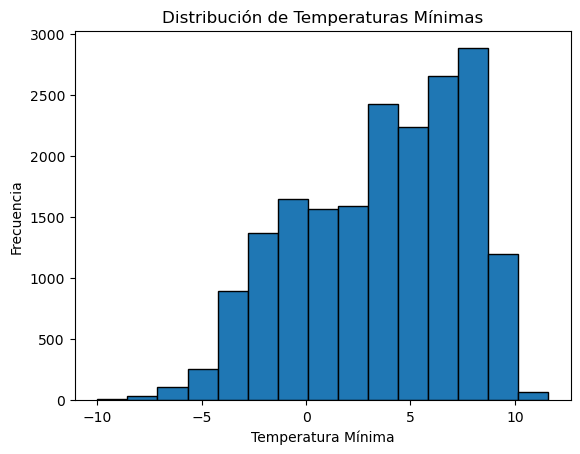

In [15]:
# Histograma de la temperatura mínima
df['Temp_min'].hist(bins=15, edgecolor='black', grid=False)
plt.title('Distribución de Temperaturas Mínimas')
plt.xlabel('Temperatura Mínima')
plt.ylabel('Frecuencia')
plt.show()

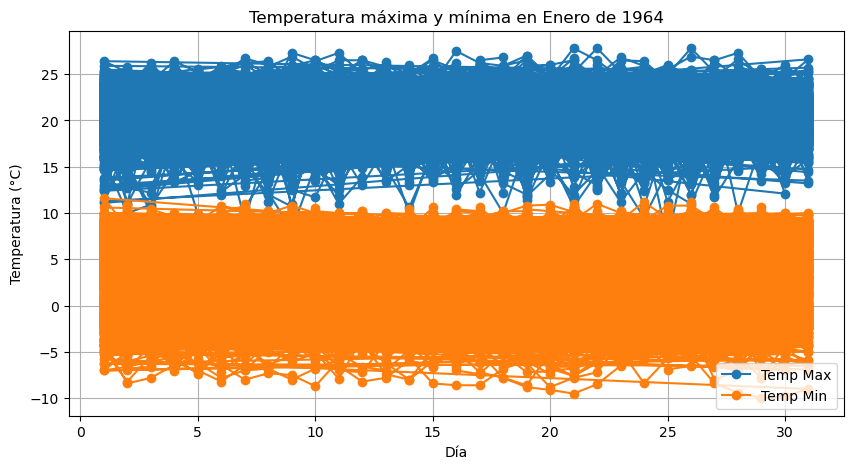

In [16]:
import matplotlib.pyplot as plt

# Gráfico de temperatura máxima y mínima a lo largo de los días
plt.figure(figsize=(10, 5))
plt.plot(df['Día'], df['Temp_max'], label='Temp Max', marker='o')
plt.plot(df['Día'], df['Temp_min'], label='Temp Min', marker='o')
plt.title('Temperatura máxima y mínima en Enero de 1964')
plt.xlabel('Día')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

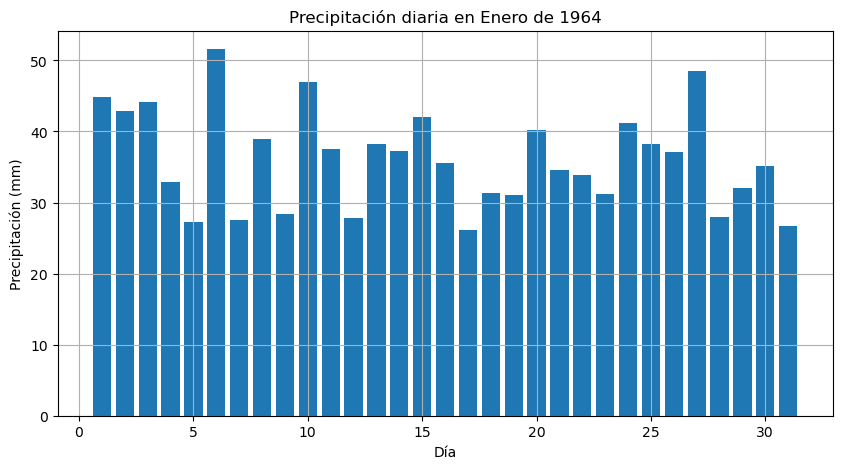

In [17]:
# Gráfico de barras para precipitación diaria
plt.figure(figsize=(10, 5))
plt.bar(df['Día'], df['Precipitación'])
plt.title('Precipitación diaria en Enero de 1964')
plt.xlabel('Día')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()